In [13]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 15

In [57]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.xlabel("alpha")
    plt.ylabel("log-likelihood")
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha_max = get_maximum_likelihood_alpha(sample, initial = 6.96, xm = xm)
        alphas.append(alpha_max.item())
        
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.99, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-95: {}, conf-99: {}".format(interval95, interval99))
    
    return interval95, interval99


def plot_confidence(n, xm, alpha):
    
    def draw(confs, title):
        plt.axhline(y=alpha, linestyle='--')
        for i, val in enumerate(confs):
            plt.vlines(i,ymin=val[0],ymax=val[1])
        plt.ylim((6,8))
        plt.title(title)
        plt.show()
    
    confs95, confs99 = [], []
    for i in range(100):
        conf95, conf99 = calc_confidence_interval(xm, alpha, n = n)
        confs95.append(conf95)
        confs99.append(conf99)

    draw(confs95, "0.95 confidence")
    draw(confs99, "0.99 confidence")
    


We first draw n = 1000 samples from pareto distribution, and plot a histogram.

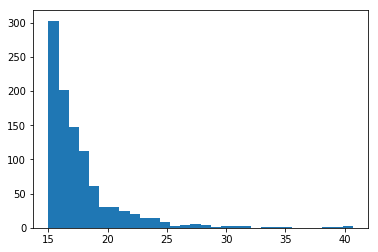

In [25]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

Next, we calcualte the sample maximum likelihood. As can be seen, the value is close to the real value of 7:

In [59]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(one_point_likelihood(alpha = 7))
print(sample_likelihood(alpha = 7))
print(get_maximum_likelihood_alpha(sample, initial = 3, xm = XM))


0
-1974.7390509914276
Optimization terminated successfully.
         Current function value: 1972.949523
         Iterations: 19
         Function evaluations: 38
[6.59736328]


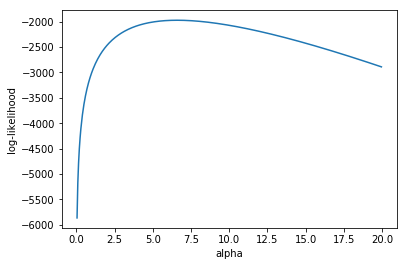

In [31]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

As can be seen, the function is maximized around alpha = 7.

In [35]:
calc_confidence_interval(xm=XM, alpha = 7, n = 1000)

Optimization terminated successfully.
         Current function value: 1899.346006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.483799
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.777829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.694271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.006312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2001.969960
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1851.361279
         Iterations: 13
         Function evaluations: 26
Optimization 

((6.946731828573203, 7.1379791089268), (6.913482090225073, 7.1712288472749295))

The 0.95 and 0.99 confidence values are both centered around 7.

Optimization terminated successfully.
         Current function value: 1869.528076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.086460
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1819.960138
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1860.480814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.037725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.316786
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.933148
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.239025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.277143
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1988.060580
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1852.562460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.346004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.710033
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.011670
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.319897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.237775
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.377919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.838870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.347205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.948361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1815.473374
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1918.882193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.911194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.113845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.972141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.970709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.836536
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.217791
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.947776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.619291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.579337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.745642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.296490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.263178
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1827.669393
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1932.263961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.357176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.769835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.007273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.321507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.856151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.940358
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1848.624002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.328878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.504175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.493510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.087721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.996506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.148774
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1953.832682
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.919172
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.617368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.052077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.170170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.491175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.802577
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.072959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.874294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.895535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.707984
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.414875
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.764451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.709189
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.233818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.692826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.367527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.411436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.067487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.358094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.297408
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.441040
         Iterations: 14
         Function evaluations: 28
conf-95: (6.988343497636158, 7.037113416426343), conf-99: (6.980605925355019, 7.0448509887074815)


Optimization terminated successfully.
         Current function value: 1900.548554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.946175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.332797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1986.425563
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.869865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.368544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.278832
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.085354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.001776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.375472
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.667913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.426143
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.830254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.717076
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.884943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.325267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.203755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.570166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2011.748355
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1860.287263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.110998
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.464560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.895666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.703188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.655628
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.090722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.508315
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.166158
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.390980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.203883
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.541961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.924660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.223479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.554511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.768144
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.819126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.062614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.373834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.736927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.037242
         Iterations: 13
         Function evaluations: 26
conf-95: (6.993250816441506, 7.043517796839744), conf-99: (6.985275728439838, 7.051492884841412)


Optimization terminated successfully.
         Current function value: 1888.756912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.266645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.730580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1805.238158
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.453191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.102197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.612694
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.485200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.223331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.280319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.637435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.004166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1999.891158
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1837.964365
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1878.274747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.561702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.557216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.458738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.452811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.046277
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.838244
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1872.861500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.055565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.915814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.449281
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.709698
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.327666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.754044
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1971.655239
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1969.893630
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.537855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.046456
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.073022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.378478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.700749
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.462664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.123549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.266099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.662740
         Iterations: 13
         Function evaluations: 26
conf-95: (6.988028346345123, 7.042261145842376), conf-99: (6.979424062874327, 7.0508654293131725)


Optimization terminated successfully.
         Current function value: 1953.500021
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.912229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.261609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.213814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.946764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.875331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.662840
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1944.689227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.966416
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1867.730430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.682685
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.053615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.307299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.249663
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.298692
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.839949
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.172354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.740058
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.733038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.112811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.565064
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1816.206480
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.711243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.681176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.731174
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.203524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.734744
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.372318
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.380299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.624362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.702123
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.787006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.457570
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.461772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.963209
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.974206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.984895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.432869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.492764
         Iterations: 14
         Function evaluations: 28
conf-95: (6.97545000690331, 7.030429641534191), conf-99: (6.966727234598169, 7.039152413839332)


Optimization terminated successfully.
         Current function value: 1897.813484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.844907
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1824.435625
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.064124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.976199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.226322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.348907
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.021110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.034842
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.331642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.440597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.950433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.093518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.381919
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.867648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.833428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.052844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.002376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.204253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.663771
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1852.253511
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.492267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.541040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.955719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.709236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.671517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.423909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.737471
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1953.535738
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.270343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1835.709596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.932355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.132757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.780207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.840359
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.535563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.895369
         Iterations: 13
         Function evaluations: 26
conf-95: (6.9673649164227545, 7.017218423420996), conf-99: (6.959455427880716, 7.025127911963034)


Optimization terminated successfully.
         Current function value: 1864.537944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.168443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.510866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.356720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.965942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.594035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.591553
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.922968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1810.697462
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.815267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.456239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.391506
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1871.599397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.021725
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.669960
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.975287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.439875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.521479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.864045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.052738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.468622
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1919.692246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.806351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.467323
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1965.555462
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.550509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.978089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.055378
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.887973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.977728
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.293936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.663664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.207154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.947549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1976.587303
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1879.582437
         Iterations: 13
         Function evaluations: 26
conf-95: (6.979196841962272, 7.030596107256475), conf-99: (6.97104211174584, 7.038750837472907)


Optimization terminated successfully.
         Current function value: 1894.155498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.349680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1842.777861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.085652
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.385931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.797231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.712910
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.610227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.751359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.648983
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.813599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.358008
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1992.806329
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1958.191224
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1911.127920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.956813
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.101112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.235129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.836915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.121871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.462132
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.236450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.619365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.700023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.603047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.386356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.459185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.079543
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1863.304334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.887551
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1938.001742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.845262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.187668
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.558972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.375796
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.008757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.701552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.047403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.072051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.299237
         Iterations: 13
         Function evaluations: 26
conf-95: (6.974947317822347, 7.0280385610839025), conf-99: (6.966524147507074, 7.036461731399176)


Optimization terminated successfully.
         Current function value: 1917.577947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.734696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.102041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.984165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.491260
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1853.535952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.565169
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1806.539899
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.532893
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.643106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.008680
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2037.778256
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1942.915068
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.589439
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.216720
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.270224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1993.685780
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.259305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.407238
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1823.151745
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.898126
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.993869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.094526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.381221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.523929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.840622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.237309
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.732389
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.568440
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.538604
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.172620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.043243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.855488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.461962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.289826
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1853.814318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.855887
         Iterations: 13
         Function evaluations: 26
conf-95: (6.980117752438866, 7.031159181154885), conf-99: (6.972019794643983, 7.039257138949767)


Optimization terminated successfully.
         Current function value: 1884.911307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.319392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.432808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.172250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.774480
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1933.645258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.332449
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.874602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.299064
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.925561
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.666372
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.369261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.330330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.651042
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1974.947740
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.902695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.621092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.024322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.344727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.666272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.095616
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.960326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.253931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1830.509947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.234584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.128709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.607693
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.487298
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.174596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.469981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.812648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.285613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.805668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.505336
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.122698
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.533752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.045645
         Iterations: 13
         Function evaluations: 26
conf-95: (6.98165177938176, 7.033243923743237), conf-99: (6.973466448012782, 7.041429255112216)


Optimization terminated successfully.
         Current function value: 1937.811823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.627257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.410908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.660255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.599984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.475949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.291741
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.858223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.948249
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.815989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.457063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.381052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.354994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.041738
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1967.450417
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.061738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.889216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.095487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.156305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.518850
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.622393
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.835341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.777675
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.784854
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.812399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.890016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.599095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.008339
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.387286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.294711
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.849260
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.017056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.702707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.458137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.060394
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.628482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.875433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.321145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.354439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.372052
         Iterations: 13
         Function evaluations: 26
conf-95: (7.000367825704497, 7.0487971547642525), conf-99: (6.992684289553062, 7.056480690915687)


Optimization terminated successfully.
         Current function value: 1918.016131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.698882
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1856.033092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.291116
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.021324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.925833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.540886
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.990111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.479143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.177633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.213637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.167484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.151954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.205465
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1827.427450
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1976.122102
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.910272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.652313
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1950.600540
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1838.150421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.711671
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.008282
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.863435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.781887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.487052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.553475
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.999837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.166332
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1924.083065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.395984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.699323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.711978
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1809.556879
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.798602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.055288
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.834432
         Iterations: 13
         Function evaluations: 26
conf-95: (7.004979602895381, 7.055962662729617), conf-99: (6.996890905592478, 7.06405136003252)


Optimization terminated successfully.
         Current function value: 1934.162664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.569367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.474620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.943671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.532371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1824.639178
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.747131
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.249022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.101332
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.957364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.505387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.626636
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.321524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.767581
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.083460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.846580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.789693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.540832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.936063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.878697
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.863242
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1857.739926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.650143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.004014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.196011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.035596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.631235
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.630692
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.231346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.970757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.662719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.072922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.787125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.355868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.863658
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.838781
         Iterations: 13
         Function evaluations: 26
conf-95: (6.968266667187431, 7.019246692187569), conf-99: (6.960178451374937, 7.027334908000063)


Optimization terminated successfully.
         Current function value: 1958.426337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.862247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.869294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.441622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.883702
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.006403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.322121
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1917.962860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.243952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.867188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.374355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.734800
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1971.346471
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1952.488140
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1903.568141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.514983
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.517392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.065846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.283441
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.715417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.790916
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.487328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.410865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.765645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.854879
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1839.272877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.709362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.531273
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.275178
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.999019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.805767
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.115799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.189933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.297371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.658346
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.437503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.684329
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.817241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.548279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.630360
         Iterations: 14
         Function evaluations: 28
conf-95: (6.971796635795413, 7.025039204048336), conf-99: (6.963349457073161, 7.0334863827705885)


Optimization terminated successfully.
         Current function value: 1850.144896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.027368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.254410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.994327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.354470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.553870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.952919
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1896.781303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.635793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.384030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.664654
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.364146
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1941.637433
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.978982
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.801422
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.062524
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1967.758303
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.001487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.659481
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.051454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.566671
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1836.648906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.617973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.199292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.033064
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1984.836725
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1984.674068
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.029002
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.393583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.562434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.289904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.318463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.190508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.320757
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.380737
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.745903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.492566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.114125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.685294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.682482
         Iterations: 14
         Function evaluations: 28
conf-95: (6.977329232069276, 7.031316178086972), conf-99: (6.968763954385567, 7.039881455770681)


Optimization terminated successfully.
         Current function value: 1899.224259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.344926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.617776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.019925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.639137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.521410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.367254
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.345987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.211581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.557848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.766688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.854847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.823879
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.747622
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.764219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.564409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.044085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.736140
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.582407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.937496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.413000
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.601269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.192891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.105506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.013116
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.078037
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.701552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.271004
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1910.771975
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.605082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.815226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.173080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.420476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.082083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.449982
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1893.226906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.783929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.648839
         Iterations: 13
         Function evaluations: 26
conf-95: (6.962390718925728, 7.009151683418023), conf-99: (6.954971876498463, 7.016570525845288)


Optimization terminated successfully.
         Current function value: 1929.870902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.927978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.353398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.525406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.588224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.445092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.305096
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.534615
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.024923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.859390
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.512323
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.882274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.657670
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1841.143210
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1967.447716
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.844296
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.791591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.518955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.330315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.310494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.446247
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1923.046246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.729323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.689115
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.273706
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.251289
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.555194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.230332
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.576258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.375099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1996.887553
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.327500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.503498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.745210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.430745
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.367836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.493121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.448558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.471342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.471675
         Iterations: 13
         Function evaluations: 26
conf-95: (6.976428980008589, 7.027575297335161), conf-99: (6.968314381152459, 7.035689896191291)


Optimization terminated successfully.
         Current function value: 1896.811489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.276565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.344638
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.525830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.464625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.225255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.768664
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1947.184500
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.888362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.780104
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.801861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.093053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.024808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.600455
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.365942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.801218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.285501
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.811145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.621456
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.505474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.173709
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1959.365562
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.801186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.989104
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1952.124458
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.073860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.600552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.337570
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.111804
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.904918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.599354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.958335
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.244265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.017202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.714144
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1848.720826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.947942
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.269324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.964868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.232687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.879062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.800836
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.012515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.268242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.849345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.536791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1980.979747
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1844.795984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.968725
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1946.741885
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.995949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.976327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.106212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.554166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.875625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.758534
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1940.781526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.465253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.936639
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.810989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.971592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.191408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.180764
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1934.315294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.702233
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.966671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.784937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1819.880599
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.849321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.299444
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.147682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.957981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.033659
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.294511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.398868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.546425
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.963276
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.776178
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.761851
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1807.073993
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.070488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.367961
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1976.589257
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.723392
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1875.632075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.094219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.189880
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.673901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.754558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.644487
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.319458
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.770730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.268342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.309112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.761841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.989299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.474583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.015790
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.789790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.613071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.925188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.895554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.363984
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.681584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.728408
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1853.757149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.839290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.709696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.346414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.517849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.782875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.928122
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1969.679137
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.755645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.731512
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.184284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.057665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.251396
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.743572
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.684317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.593592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.443504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.770808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.002059
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.332748
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.012562
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1872.231148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.280263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.342513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.365294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.491432
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.250242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.864854
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1960.371207
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.423756
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.632332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.982257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.789896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.848892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.311709
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.606365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.172458
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.253595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.974312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.808017
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.687299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.244629
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1916.424633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.877771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.917166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.860912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.726813
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.963478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.890260
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1934.528001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.749568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.978659
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1839.733557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.663779
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.472014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.280306
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.766863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.929711
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.368164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.213329
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.160783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.946740
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.288036
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.238299
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.587552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.920050
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.922795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.796795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.006921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.525765
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1933.776984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.721079
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.946945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.851024
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1801.711982
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.076468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.112043
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1955.278781
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.867391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.946194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.425969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.106302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1980.440780
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.197602
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.521704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.507724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.966065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.918101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.032107
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.049861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.444728
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1931.010974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.215906
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.253226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.681390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.043610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.972607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.893522
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.454429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1993.263031
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.856202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.833555
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.459009
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1774.422424
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1879.193526
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.146537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.829592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.245626
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.323646
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1818.559067
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.727695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.529282
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.861561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.343381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.246536
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.899968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.805071
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.368198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.583955
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.982772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.455759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.490461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.122468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.012774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.289244
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.503937
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1827.217478
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1833.277320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.673235
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.854309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.948239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.025827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.674661
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1875.694638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.834676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.633169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.979671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.845767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.941790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.727985
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.539007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.902734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.575053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.902365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.277637
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.271959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.722505
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1876.214229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.962743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.860020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.148717
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.563154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.644964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.180151
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.838044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.447652
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.219095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.477414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.074263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.270899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.764634
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.226139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.820667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.634306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.521526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.294262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.209721
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.844935
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.964575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.774418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.578930
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.154827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.864553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.503016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.098156
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.920897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.489995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.953989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.348191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.834532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.269876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.689278
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.475375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.652977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.062488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.581586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.176848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.428795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.391290
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.541005
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.685521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.154006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.174285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.380598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.454171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.297684
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.375677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.140227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.201580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.098149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.884552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.256252
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.800191
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.059026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1982.301852
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.232933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.436686
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.812969
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.754573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.552936
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.325907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.738150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.493793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.152839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.184705
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.192397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.031740
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.516669
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.905623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.625957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.846206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1827.748992
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.489510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.638742
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1826.172971
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.730681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.172913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.480958
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1981.861208
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.761996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.047008
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.183911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.468271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.034939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.584613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.603959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.086845
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1856.876454
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.616740
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.992392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.536680
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.235402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.222261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.539464
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.820643
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1959.187093
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.853663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.451934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.599995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.962176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.001886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.532111
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1905.526247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1808.331628
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1819.190227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.182904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.280551
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.821420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.716804
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1856.152281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.535123
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.223948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1980.574327
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.024019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.560283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.095441
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1909.207728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.006054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.634530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.290526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.274802
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.298564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1829.814024
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.578206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.040263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.867047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1789.308526
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.792613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.607385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1821.177272
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1903.449467
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.298997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.550983
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.090006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.422433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.766210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.863416
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.023893
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.007665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.852679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.756495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.247887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.953724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.284971
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.508389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1824.041847
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.233028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.458296
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.171354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.181355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.625699
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1872.733783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.459387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.626514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.691820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.497123
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1946.499028
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.410569
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1860.364416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.641775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.669446
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.467874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.049518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.867500
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.196394
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1947.649356
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.888040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.299181
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.725163
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.775599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.491226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.302651
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.208869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.881184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.707656
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.107621
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.931428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.887521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.438916
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.417532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.654720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.199920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.263614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1989.013730
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1848.783367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.223095
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1851.525776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.982433
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.732541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.972457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.378029
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1941.165312
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1946.601542
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1846.620122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.858067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.449736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.606190
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.588968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.977279
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1967.964031
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1916.856235
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.180846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.321119
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.212506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.380573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.170002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.765863
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.603087
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.657231
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.854560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.153539
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.565575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.977906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.724499
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.380122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1990.378370
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.762627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.672664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.815886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.402787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.465718
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1927.220671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1817.928469
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.157668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.505397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.065390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.788846
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.088684
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.846460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.683873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.631002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.653532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.079821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.100191
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.382151
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.063562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.696949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.347350
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.116557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.223656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.133061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.485815
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1859.920558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.677715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.142411
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.618720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.985489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.621244
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.730699
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.507086
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.536160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.520839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.369362
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.560840
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.645253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.877929
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1903.148404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1999.656116
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1845.027212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.946139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.165156
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.757057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.170354
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1849.664975
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.968817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.180333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.161757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.028771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.415588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.754046
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.137609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.068855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.149738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.669312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.587310
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.451187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.281910
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.384452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.407039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.632743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.037560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.931772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.595275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.586445
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1901.227268
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.391968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.659875
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.354578
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.619084
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.676605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.820563
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1864.692512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.008043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.546144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.524583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.296949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.392648
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.525778
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.350479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.724945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.542917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.974003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.018671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.500378
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.206060
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1835.787512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.587512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.686131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.593378
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.253668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.675106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.259591
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.421600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.686461
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.647202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.644711
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1793.840505
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.709019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.891855
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.910863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.875327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.283161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.923142
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.876365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.889590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.505060
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1863.713233
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.504263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.346480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.972752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.565861
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.277362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.978770
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.281963
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.817845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.171777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.627358
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.999946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.896815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.320724
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1919.052500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2008.264715
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1886.618194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.387198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.709618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.733735
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.907939
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.965602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.332684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.410305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.120597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.506961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.694305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.949235
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.687339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.584972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.454130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.321200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.151666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.028925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.067128
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1901.664431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.328239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.829866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.537727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.247913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.628559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.444639
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.655438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.672624
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.997152
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.314931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.136390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.693173
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.957720
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1869.975102
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.757273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.249246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.929639
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.731574
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.190269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.490067
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.608357
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.548703
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.853921
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.686509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.693594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.989481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.715463
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1975.111581
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1849.467103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.193858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.286155
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.591483
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.046318
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.111720
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.364109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.659167
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.101031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.127206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.853189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.574563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.039522
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.758060
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.992616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.075988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.841891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.841309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.703455
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.359880
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.508899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.421776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.183304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.713156
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.481820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.521697
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.914569
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.068426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.953286
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.225826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.895678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.966962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.552936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.429294
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1874.361286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.889193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.861271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.172375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.721263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.912792
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.152233
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1843.114898
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.365676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.910490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.634098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.841097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.900175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.363620
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.188905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.812318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.319136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.720110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.914129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.348443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.873091
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.752361
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.291112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.478384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.436310
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.204971
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.885510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.591526
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.018188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.346139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.396899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.877371
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.028503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.668509
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1843.346619
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1878.233641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.685935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1807.283569
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1958.245032
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1913.665229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.798987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.618537
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.174368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.088267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.344614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.878399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.322339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.762826
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.918062
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1793.957998
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.779139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.231539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.561120
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.720316
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.407610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.863132
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.185976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1811.282271
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.360507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.638651
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.127073
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.139368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1829.022074
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1961.105879
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.876056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.551618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.984957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.983862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.989594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.667022
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1944.375715
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.499141
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.242961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.454322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.341199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.582728
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.821415
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1942.735574
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.210842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.322160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.657899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1803.790129
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1824.229531
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.180558
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.231328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.262288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.318995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.222286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.487897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.557819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.728591
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.676485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.860649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.094730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.809423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.006893
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2006.869597
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1929.732211
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.076454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.208519
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.358624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.046218
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1836.908974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.606111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.417653
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.861998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.055375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.116763
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.141906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.631109
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.650917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.607510
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.089162
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.131935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.689753
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.245854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.291801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.203288
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.488817
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.052403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.008903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.937397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.942218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.588672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.907707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.520349
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1901.452553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.498959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.103037
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.271743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.144485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.039817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.426218
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1875.363725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.093356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.545757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.499378
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.634945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.110065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1831.183513
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.604216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.431695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.742906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.461931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.886710
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.166905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.372290
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.654419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.452125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.489161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.829166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.743493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.516977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.916018
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.298502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.313795
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.262103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.478573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.168423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.343346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.139067
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1935.872365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.102578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.929551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.105543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.821365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.300183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.457000
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.647666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.159959
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.826624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.530676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1823.383789
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.041072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.657088
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.147537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.278343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.996180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.849763
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.727361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.354401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.830031
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1869.172977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.099018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.351695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.915936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.416365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.979863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.675329
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.175758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.478595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1805.040089
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1975.917201
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.058052
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1841.919183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.188176
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.864677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.364039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1827.015642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.786549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.394823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.960929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.203733
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.769576
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.528616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.979117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.632599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.264435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.903478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.606917
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1875.409709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.997644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.220924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.661114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.221419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.141115
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.087450
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.210055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.846665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.726792
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.792989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.798375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.803096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.624669
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.898560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.659039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.443106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.502539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.105917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.617979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.047394
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.306453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.352825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.381832
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.855398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.005720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.203054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.680591
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.235926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.780434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.105062
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1893.418071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.629117
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.127661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.882281
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.035736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.604859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.094163
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.964594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.583680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.840807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.773417
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.063466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.973843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.555516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.147821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.491078
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.182503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.533049
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1878.053107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.773652
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.721854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.832990
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.049799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.656591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.871634
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 2002.094418
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1894.892024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.496039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.328563
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1938.059382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.076775
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.338926
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1940.545118
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.965154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.100492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1988.299723
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.310167
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.521443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.777727
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.336695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.949774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.963308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.846510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.171428
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.309872
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.275821
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.015928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.080640
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1853.208922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.332978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.188546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.196666
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1850.318126
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.627935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.590043
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.886684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.003329
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.646943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.194335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.125700
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.176514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.588636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.049941
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.779185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.944291
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.745517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.596757
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1878.740758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.008860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.245091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.648015
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.935543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.399480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.515269
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1892.931054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.835166
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.262630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.522197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.843147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.947730
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.064984
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1916.215689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.624376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.041859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.692803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.940071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.670802
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.772340
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.760262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.432868
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.967744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.845254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.049439
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.187670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.813376
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.720702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.095531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.470282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.858643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.572370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.228857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.104743
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.901918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.564938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.035341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.567901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.670218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.420211
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.554384
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1955.523270
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.724315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.954620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.813617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.881597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.275371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.579597
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1885.345830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.250561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.335540
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.595419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.747027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.283614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.744419
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1850.690466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.789452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.032294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.459733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.127847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.129943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.331785
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1914.466386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.307181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.205823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.993741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.640460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.689060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.148151
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1958.691167
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.667754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.120939
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.278452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.140585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.551012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.874980
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1937.791245
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.726859
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.631913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.840038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.739563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.902843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.999036
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.301266
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.783323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.084580
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.603140
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.272417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.854460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.021903
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.790395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.400948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.093375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.563598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.715310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.754057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1802.533677
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.269925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.494896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.138083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.607310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.131027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.798005
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.423704
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.315908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.795311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.519913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.661885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.950245
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1849.013672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.237434
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.195175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.849427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.133539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.304307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.159297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.944925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.942944
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.034375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.723752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.144367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.990870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.225645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.801011
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.353782
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.175237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.760346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.815262
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.774308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.190569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.102162
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.503101
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.517959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.056661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.412866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.243984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.815762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.738672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1984.471112
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1897.137555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.214985
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.303910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.679395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.952023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.457848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.861511
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.237921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.013242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.834234
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.760223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1991.334240
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.857928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.366432
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1859.600756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.220095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.567090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.705667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.151032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.312433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.700609
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.674111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.832326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.959048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.119090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.438741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.904186
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.320030
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1937.535929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.032424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.763488
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.679625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.888086
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.349460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.291593
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.639298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.642562
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.536264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.351776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.728493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.564652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.902893
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1904.887055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.479727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.655964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.950991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.691922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.468436
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.929628
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1901.115583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.394375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.708242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.776134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.360597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.285844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.710280
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1938.907637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.991063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.583426
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1952.547172
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1971.746099
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.405046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.898418
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1916.347417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.232342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.839364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.815915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.585568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.685134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.649656
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1954.318320
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.607368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.347762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.919039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.358124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.164070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.500369
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.814088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.608267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.450911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.843920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.877854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.684700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.147725
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1973.403366
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.463293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.048711
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.149239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.240901
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.575869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.591726
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1841.874157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.259544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.272658
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.554971
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.607026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.098382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.548800
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.610631
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.858747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.898322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.320633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.232548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.771993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.872795
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1857.218566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.952606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.831724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.544108
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.231272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.880664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.096987
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 2016.566125
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1964.997970
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.016497
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.224996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.451313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.803327
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.776485
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1957.199932
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.821206
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.206663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1805.762937
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.050516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.167310
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1848.795986
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.639702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.306529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.393035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.211530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.172187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.279814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.470060
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1805.613566
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.481379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.227700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.580504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.478062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.027732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.763370
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.349084
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.240016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.766364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.549488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.045494
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.853074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.526134
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.226724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.217043
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1893.389720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.994622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.584958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.831012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.134223
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.276011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.184722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.901322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.847947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.264917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.382473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.839637
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.753809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.874214
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.795543
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.411877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2003.110898
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1931.867134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.079334
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.343031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.904618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.938502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.015254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.781955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.287160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.451353
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.287979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.037877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.202424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.663923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.259765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.162616
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.385431
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1951.320827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.946198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.009181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.699343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.770058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.565709
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.690135
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1838.582477
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.802814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.227423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.153340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.803339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.057205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.247258
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.602966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.151447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.867037
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.678828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.228065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.766457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.049393
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.129203
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.374446
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.585113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.875127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.459044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.828632
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1831.355048
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1977.361638
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.649204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.922347
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.114596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.647720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.533603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.369400
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.585516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.299653
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.203068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.667349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.832447
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.515033
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.277637
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1918.278265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.024100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.661933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2038.461048
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1933.319325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.018004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.334232
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1904.663376
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.577933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.038196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.705971
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.463785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.537295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.581418
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1926.794677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.048552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.004019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.131560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.264001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.799980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.253390
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.087405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.580176
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.183045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.428772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.257539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.137334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.065352
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.795387
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.084349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.668642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.742785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.760625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1819.693242
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1842.502522
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.148010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.332328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.407185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.260957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.383653
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1913.654901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.631956
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.654057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.152790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.339751
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.330887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.608023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.978180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.504527
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1866.015196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.512703
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.442284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.329542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.525301
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.311887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.000568
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.772121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.521223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.540635
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.747040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1830.272503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.270957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.072577
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1934.592829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.222092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.979717
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1941.803119
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1950.414705
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1960.257601
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.048723
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1850.573202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.464226
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.179928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.545734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.590811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.696384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.515402
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.200408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.813378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.056790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.447835
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1846.640960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.235823
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.247389
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.265024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.163955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.287527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.062918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.506164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.086279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.375242
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1935.344772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.076688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.038447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.741265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.011116
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.253794
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.281980
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1976.623445
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1850.233609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.654972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.349687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.457074
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.569622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.157611
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1903.529491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.500369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.934191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.932526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.144222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.089601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.601291
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1863.836790
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.170409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.863036
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.303068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.898604
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.492914
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.571954
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1844.346457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.634149
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.632725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.186837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.360918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.866245
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.130406
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.677374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.139807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.706149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.414861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.491216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.136650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.924894
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.875950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.476623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.365312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.858048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.453615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.357414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.063161
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.352688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.891635
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.496707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.078065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.816209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.020947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.875552
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.754261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.362205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.013390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.215520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.985367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.554261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.483075
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1830.689772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.721119
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.762614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.661263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.324255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.144051
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.308084
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1849.469147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.769524
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.753986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.277454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.198489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.116490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.596075
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.579197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.129478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.969361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.666165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.552231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.529145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.008837
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.802322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.236246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.394917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.810361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.300921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.396446
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2028.522401
         Iterations: 15
         Function evaluations: 30
Optimization 

Optimization terminated successfully.
         Current function value: 1944.891412
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1932.622397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.471829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.345320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.796783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.741439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.123630
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1873.891634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.555783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.851388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.559824
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.447282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.576536
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.399637
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.540620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.683670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.460303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.502851
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.206630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.435613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.934975
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1848.595637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.024228
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.813189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.737821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.728719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.987373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.063836
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1882.943918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.846322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1835.602452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.208278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.849321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.378923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.296300
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.339564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.031814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.961043
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.624547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.515864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.351901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.946698
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1872.734090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.007223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.618926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.392710
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.928915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.686148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.753173
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1847.124944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.698509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.111860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.538416
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1853.211798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.121734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.663246
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.612742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.747438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.395463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.195814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.594374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.938439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.436377
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.027694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.871148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.473597
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1932.805861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.157999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.173031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.949663
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.564138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.668450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.606992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.210627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.393855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.715546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.992761
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.244351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.287778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.666784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.430130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.454108
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.351268
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.450608
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1965.387824
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.633579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.400314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.300844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.575337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.940822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.279424
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.783222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.658984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.682839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.797993
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.694680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.223040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.169356
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1947.006654
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1854.667243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.507074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.733903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.139846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.758257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.853461
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.819389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.223070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.548799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.310923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.753152
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.453173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.690984
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.436159
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.953392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.866126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.805634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.423509
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.414633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.527027
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1870.422557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.683749
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.798432
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.044284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.313415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.424171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.699682
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1953.016912
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1954.742930
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.424344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.532830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.659765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.516410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.413470
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.965747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.046845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.983889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.321924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.730127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.904736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.778777
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.159999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.452888
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1977.042946
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1854.762871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.572637
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1853.139767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.236884
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1934.656364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.938304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.103454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1977.768827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.747554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.455293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.762292
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.845076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.729658
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.226563
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.482258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.847873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.764046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.426941
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.793743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.700172
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.081892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.189475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.457422
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.742230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.791614
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.076178
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.471237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.504129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.072010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.453402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.103883
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.804811
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.108726
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.373970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.591847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.785681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.517584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.491670
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.273658
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.238745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.348842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.999689
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.542178
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.142474
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.486389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.154239
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.458407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.271981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.627308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.844044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.749542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.371995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.102104
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.927282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.931597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.731683
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.012670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.663211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.702797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.382875
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.841923
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.525455
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.218498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.160355
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.210519
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.064961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.919131
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.054771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.412275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.523937
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.785149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.792588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.938718
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.614413
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1888.857837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.952450
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.660020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.333204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.007141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.670676
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1956.756397
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1879.138145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1828.030900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.430055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.037548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.608570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.727844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.383889
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.010389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.076915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.755246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.880190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.962824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.271404
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.685601
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1923.233031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.590396
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.078036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.582487
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.132881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.351762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.968379
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1922.432074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.724030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.327901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.103390
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.612884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.944034
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.176116
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1862.123884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.231111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.215077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.148334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.862562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.998925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.757073
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.841953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.589803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.789507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.195004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.281521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.417197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.450609
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.185900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.626517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.026791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.632235
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.405573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.282611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.080414
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.354966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.661334
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.825401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.831561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.288845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.695617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.216616
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1947.087183
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.522726
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.507679
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1861.256412
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.895584
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.981941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.074080
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1863.920304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.029071
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.822185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.547570
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1886.756747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.517992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.758182
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1922.355583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.948684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.426970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.446624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.735787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.520047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.237064
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1942.012168
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.309370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.261710
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.951221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.302870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.945363
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.889330
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.929793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.590927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.880765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.597716
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.028421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.231839
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.374218
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.164158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.991332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.082476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1794.132147
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.042848
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.593856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.672019
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.758885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.743889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.241232
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.853187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.797571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.533414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.236122
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.733905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.697925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.336923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.953539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.563154
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.016126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.876331
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.502569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1996.180320
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.881761
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.162109
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1831.882306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.966765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.232806
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1861.552503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.223189
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.639935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.615379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.633231
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.412095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.388974
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.497398
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1963.974634
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1893.222716
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.895301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.386014
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.261666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.984029
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.203398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.307357
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.064805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.599312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.879989
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.417925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.590494
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.844132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.812284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.997380
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1801.858503
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.968236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.443607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.652068
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.755009
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1831.283458
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.892931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.747825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.356714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.947091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.787772
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.127327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.622015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.055216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.880526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.783894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.005952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.078357
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.882786
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.215792
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.260579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.976449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.744170
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.208921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.774846
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.880253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.244275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.331885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.505461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.189645
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.911395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.736678
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.904125
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.772279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.633373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.240967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.813750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.265461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.245212
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1851.685199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.735043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.550931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.649992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.368550
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.286284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.395307
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.237986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.466025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.969935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.936917
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.377378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.532901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.148870
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1940.423586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.839870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.896413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.000071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.546349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.585148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.887984
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.514424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.946129
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1955.606434
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.721556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.493306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.550471
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.200367
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.867132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.528030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.248000
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1955.043108
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.758957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.779401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.178813
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.668578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1829.889628
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1814.157123
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1941.420795
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.743576
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1913.947418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.237092
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.249922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.946077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.977602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.831835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.728560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.033212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2010.875628
         Iterations: 15
         Function evaluations: 30
Optimization 

Optimization terminated successfully.
         Current function value: 1889.993547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.679324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.734873
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.024349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.033215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.249739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.705796
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.625511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.293056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1842.733715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.284804
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.671208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.211745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.386735
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.032495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.427321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.813392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.772486
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.513351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.364656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.639954
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1847.136314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.459958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.019487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.186676
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.347536
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.585663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.680512
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1838.976937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.916089
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.729685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.816640
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1893.615155
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.431035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.993683
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1925.907833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.267261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.652302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.638797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.268343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.257253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.377930
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1970.212622
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.832138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.200344
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.338950
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.851014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.166781
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.822127
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1869.773332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.789535
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1968.463509
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.490856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.300096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.642520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.932133
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1854.590407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.698055
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.345525
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.254511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.426680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.228947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.398524
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1849.824931
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.634160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.392871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.300601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.147613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.264060
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.065662
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1938.261381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.208541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.632081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.961767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.159688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.531156
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.321631
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.601815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.845000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.903083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.332341
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.633124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.255872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.274384
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.490898
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.692531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.625569
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.286743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.358664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.111407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.121361
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.434313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.116834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.218729
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.848480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.153438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.059538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.418763
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.410848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.076535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.472046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.960029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1989.071141
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1954.913286
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1953.350527
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1850.136935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.837233
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.167759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.690563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.223438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1812.123044
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.495893
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1936.252449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.412027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.940495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.512384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.567582
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.766059
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1982.363584
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1955.491840
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.071775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.144298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.992443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.442164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.298615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.493228
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.006594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.865508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.748814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.796597
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.203016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1998.734476
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.164784
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1791.307935
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.617793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.486448
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.204831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.020219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.936102
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.070765
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1864.151928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.729702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.050982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.551079
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.506261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.200894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.155139
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.804505
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1845.340441
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.077988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.116500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.972366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.424475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.715755
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.197759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.780366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.640782
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.803478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.259903
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1828.460873
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.223138
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.788676
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.642143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.594554
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.523490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.189157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.910988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.580806
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.201861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.232890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.594625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.640574
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.584868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.305182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.185729
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.849476
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.850202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.666202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.187647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.751500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.134216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.021865
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1938.364471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.867609
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.450415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.301484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.775578
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.843567
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.895612
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1874.364305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.107230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.200581
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.563492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.792993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.325716
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1886.147704
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.470217
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.070359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.573101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.800109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.212250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.464275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.473847
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.121406
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.452430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.685397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1977.089074
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1861.318938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.586016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.513013
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1912.566498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.880578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.894131
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.006757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.457425
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.473889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.299816
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1952.946359
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.473563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.539238
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.601199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.712067
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.139144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.695449
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1881.810047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.332666
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1860.344125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.101239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.015091
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.944911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.845941
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1852.893253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.163382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.473305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.984958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.450170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.955708
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.347139
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.905072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.088532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.869830
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.105394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.620803
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.515614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.035481
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.875374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.387176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.379724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.306677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.022186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1835.208573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.100806
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1981.071764
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1933.941356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.818881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.298257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.922246
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.247051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.903366
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.814708
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1995.303893
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.114854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.292332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.518022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.893516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.501459
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1946.771602
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.931688
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1954.119611
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1963.615104
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.358918
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.514341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.488614
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.260674
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.090264
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.205384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.174516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.816109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.939934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.294112
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.708415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.891765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.074680
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1816.047427
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.319300
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.075557
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.715385
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.974137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.427037
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.400926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.959361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2017.006404
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1943.874755
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1852.257655
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1861.131093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.927003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.329610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.558252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.920810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.357619
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.866462
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.663855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.975157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.747539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.907291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.424860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.515326
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.713633
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.330366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1824.721840
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.895733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.445348
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.977145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.302700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.106148
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.746559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.952429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.861788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1977.711596
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.492331
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.700899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.116185
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.857559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.952271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.116003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.297600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.707372
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1823.378418
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.585617
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.478602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1987.255728
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.278692
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.061987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.708716
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.141107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.671034
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1938.985865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.812635
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1848.715098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.391921
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.471240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.909400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.116782
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1971.618440
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.236578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.557700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.659704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2006.972978
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1893.236612
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.125344
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1929.828835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.296530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.855993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.185279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.811765
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.274635
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.122125
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1901.221452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.206377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.939173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.138260
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.546590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.335209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.260273
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.257543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.688377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.804436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.830042
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.738110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.551835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.611574
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.965563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.338347
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.836139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.028051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.334737
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.002253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.698394
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1926.991338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.181772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.207191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.047071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.531311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.659589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.923810
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.126542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.341585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.233183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.224578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.384026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.857380
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.428158
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.887322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.241668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.509693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.501791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.963228
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.525818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.043411
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1969.262307
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.685836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.275091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.853197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.149573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.761613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.542634
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.982041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.699935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.129979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.211839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.890585
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.157212
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.760939
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.060829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.384520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.382688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.926192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.463878
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.434443
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.081593
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.649556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.568100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1988.657384
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.272319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.281181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.059136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.326262
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1953.013126
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.194920
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.868151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.752519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.007226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.576940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.076280
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1929.991145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.612283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2003.875600
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1933.051955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.303191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.034754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.436985
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.633647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.109955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.035294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.101453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.307421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.491938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.507584
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1912.910968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.991332
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.031337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.780371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1976.209481
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.536428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.382407
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1935.832044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.495014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.975752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.205729
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.209565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.185628
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.746314
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1924.758416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.789278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.689359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.377430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.602086
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.441090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.561397
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1977.513245
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.251633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.910231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.054143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.097153
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.899406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.154759
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1875.087530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.754973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.141113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.853954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1810.179913
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1946.651342
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.290426
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1965.432141
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.558465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.759715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.688335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.705998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.443507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.086576
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.443680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1990.548657
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1957.526620
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.519822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.093902
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.494554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.078574
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.962930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.897684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.029516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.347007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.366154
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.146445
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.641933
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1942.285609
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.072341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.716237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.788757
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.083431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.507098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.427372
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1856.655478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.515433
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.689427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.690174
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.601031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.162759
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.732471
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1854.762418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.777375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.406435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.988952
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.163040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.945543
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.809763
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.711512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.044662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.696126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.962528
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1867.089117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.124470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.157461
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1830.598538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.561199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.294985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.266927
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.643342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.246939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.089987
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.985147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.930853
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.886528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.985354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.977208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.420000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.310228
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1950.219692
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1979.719728
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.832393
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.600572
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.242870
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.645508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.490081
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.570351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.002408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.203161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.040556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.766076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.998837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.057003
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1869.759254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.000776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.577226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.333657
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.393240
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1950.287637
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.137628
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1906.943743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.307644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.381186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.608070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.226530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.013529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.017985
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1946.725229
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.156264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.344121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.559603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.321872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.277401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.798500
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.560188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.784925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.645418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.911512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.858643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.688827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.569664
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.532453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.857287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.759150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.538157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.182169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.875421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.376745
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1849.308522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.396324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.426256
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.025215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.141201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.762253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.936691
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1888.923316
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.734158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.097799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.489200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.639872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1805.831851
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1967.420133
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1861.375517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.926035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.980779
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.423165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.031271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.640474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.628337
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.864106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.024120
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.383815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.447465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.730230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.604081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1813.401108
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1895.496977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.946601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.021546
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.228934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.306730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.118958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.443958
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1891.575090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.929912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.833366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.125061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.762344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.551344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.771627
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.751227
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.342073
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.274176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.822997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.567171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.208610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.395208
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.085973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.999433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.951429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.593966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.935127
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1956.890734
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.051730
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.509367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.742460
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.388097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.883611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1816.550699
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.803785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.834727
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.505031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.144416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.098708
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.278620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.586842
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.104827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.164348
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.836414
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.777496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.509866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.004828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.364025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.743814
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.762657
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1911.230738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.377072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.096375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.895672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.634031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.952497
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.639859
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.813365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.245552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.216855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.819724
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.281082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.980727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.141114
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.401961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.053999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.585285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.187109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.613420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.713915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.002440
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1888.767022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.949209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.123132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.193479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.325907
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.827041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.099970
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1862.351602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.940327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.899693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1828.477436
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.056461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.591415
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.569423
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.012785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.469485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.625653
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.304266
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.204472
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.032430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.774459
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1987.232258
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.118219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.738197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.253247
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1847.566699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.890844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.150434
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.682823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.773563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.593764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.238906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.499534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.753025
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.445638
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1862.827773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.953016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.743062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.176169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.735370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.121888
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.611827
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1956.653804
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.916302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1842.895991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.601201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.327769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.069455
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.463705
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1990.268868
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.166864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.683921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.063081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1821.727500
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.355807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.119464
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1929.070912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.351982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.172875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.431536
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1836.330374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.309071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.259950
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.740109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.767438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.599667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.608147
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1871.205690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.886698
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.348626
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.395145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.819634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.784344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.443832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.558000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.553019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.626027
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1978.695072
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.228759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.682590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.406225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.277217
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.828891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.164342
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.010744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.897144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.575674
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.584717
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.530821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.955401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.988744
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.889838
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.624284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.157841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.045859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.771727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.513856
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.166193
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.978222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.904394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.466936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.284615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.900521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.014705
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.586798
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1964.379693
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.165627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.129180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.962578
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1817.999126
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.933024
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1958.790491
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1924.591658
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.443745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.703570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.559430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.144362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1987.009678
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.574676
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.187673
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.515064
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.473488
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.022761
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.088351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.554853
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.600665
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1838.903180
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.777232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.544815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.420556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.364209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.528295
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.267127
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.694880
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.482324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.477542
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.492090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.025110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.269929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.170948
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.115263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.042620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1993.384784
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1819.149601
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1833.658056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.451794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.573762
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.991069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.027935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.993868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.073535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.983681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.867197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.846969
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1898.709860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.472923
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.861440
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.852470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.258201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.193508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.785433
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1958.011800
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.984544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.157113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.687857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.113166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.071616
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.780014
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1935.381484
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.598968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.867442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.765379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.124889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.285422
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.136092
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.579431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.362160
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.277351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.905726
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.744642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.837177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.978139
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.066407
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.247183
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.137809
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.774945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.291106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.490956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.828285
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.037377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.315669
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.396512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.503578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.465592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.777188
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.624186
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.886355
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.636417
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1975.785699
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.311554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.186652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.143082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.361731
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.952822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.562454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1842.334185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.048274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.649645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.126820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.528239
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.786563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.467250
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.068713
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.430589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.217076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.489791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.026469
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.306293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.016473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.434062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.414122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.078827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.323392
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.460744
         Iterations: 13
         Function evaluations: 26
Optimization 

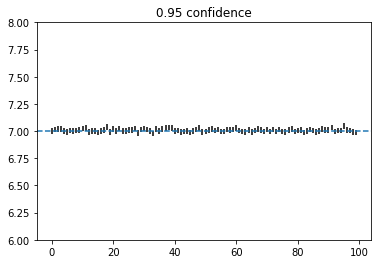

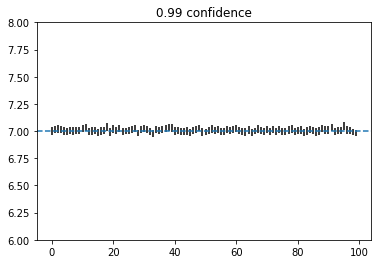

In [58]:
plot_confidence(n=300, xm = XM, alpha = 7)